In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [8]:
cancer = pd.read_csv('Breast-Cancer.csv')
cancer.head(5)

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [9]:
cancer.shape

(116, 10)

In [10]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  
 3   Insulin         116 non-null    float64
 4   HOMA            116 non-null    float64
 5   Leptin          116 non-null    float64
 6   Adiponectin     116 non-null    float64
 7   Resistin        116 non-null    float64
 8   MCP.1           116 non-null    float64
 9   Classification  116 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 9.2 KB


In [76]:
cancer.drop(columns = "HOMA", inplace = True)
cancer.isnull().sum()

BMI               0
Leptin            0
Adiponectin       0
Resistin          0
MCP.1             0
Classification    0
dtype: int64

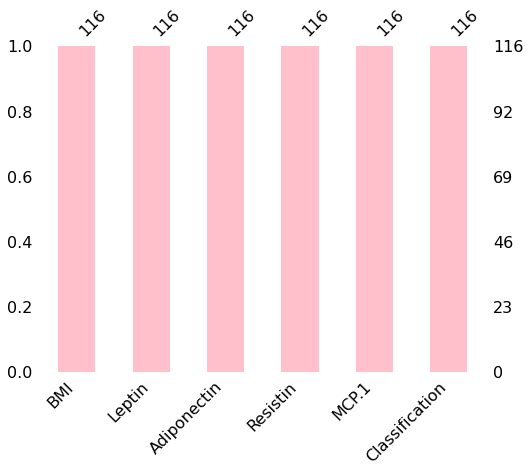

In [77]:
import missingno as msno
msno.bar(cancer, figsize = (8, 6), color = 'pink')
plt.show()

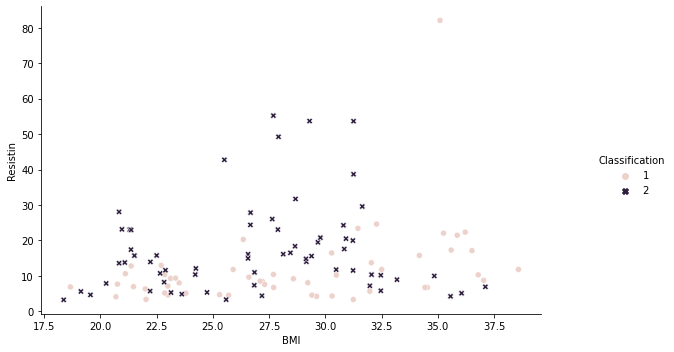

In [78]:
g = sns.relplot(x = 'BMI', y = 'Resistin', data = cancer, hue = 'Classification', style = 'Classification')
g.fig.set_size_inches(10, 5)
plt.show()

In [79]:
cancer.corr()

,BMI,Leptin,Adiponectin,Resistin,MCP.1,Classification
BMI,1.000000,0.569593,-0.302735,0.195350,0.224038,-0.132586
Leptin,0.569593,1.000000,-0.095389,0.256234,0.014009,-0.001078
Adiponectin,-0.302735,-0.095389,1.000000,-0.252363,-0.200694,-0.019490
Resistin,0.195350,0.256234,-0.252363,1.000000,0.366474,0.227310
MCP.1,0.224038,0.014009,-0.200694,0.366474,1.000000,0.091381
Classification,-0.132586,-0.001078,-0.019490,0.227310,0.091381,1.000000


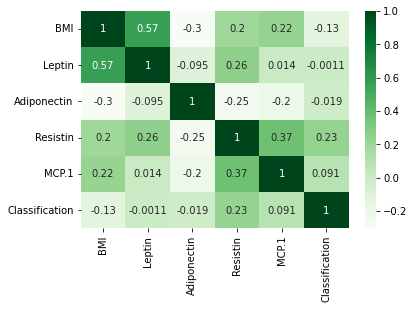

In [80]:
sns.heatmap(cancer.corr(), annot = True, cmap = 'Greens')
plt.show()

In [83]:
X = cancer.drop('Classification', axis = 1 )
y = cancer['Classification']

In [60]:
X

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920
...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460


In [84]:
y

0      1
1      1
2      1
3      1
4      1
      ..
111    2
112    2
113    2
114    2
115    2
Name: Classification, Length: 116, dtype: int64

In [85]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1], dtype=int64)

In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print('The shape of X_train is : {}'.format(X_train.shape))
print('The shape of X_test is : {}'.format(X_test.shape))
print('The shape of y_train is : {}'.format(y_train.shape))
print('The shape of y_test is : {}'.format(y_test.shape))

The shape of X_train is : (92, 5)
The shape of X_test is : (24, 5)
The shape of y_train is : (92,)
The shape of y_test is : (24,)


In [87]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [88]:
#prediksi data pada train

pred_train = model.predict(X_train)

cm = confusion_matrix(y_train, pred_train)

#confusion matrixt

print('Confusion matrix Naive Bayes\n', cm)
print('')

#akurasi
print('Akurasi pada saat training : {}'.format(accuracy_score(y_train, pred_train))) #confusion matrix

Confusion matrix Naive Bayes
 [[29 12]
 [21 30]]

Akurasi pada saat training : 0.6413043478260869


In [89]:
#Prediksi pada data test
pred_test = model.predict(X_test)

cm = confusion_matrix(y_test, pred_test)
accuracy = accuracy_score(y_test, pred_test)
precision = precision_score(y_test, pred_test, average = 'micro')
recall = recall_score(y_test, pred_test, average = 'micro')
f1 = f1_score(y_test, pred_test, average = 'micro')

print('Confusion matrix Naive Bayes\n', cm)
print('Akurasi pada data test: %.3f' %accuracy)
print('precision : %.3f' %precision)
print('recall : %.3f' %recall)
print('f1-score : %.3f' %f1)

Confusion matrix Naive Bayes
 [[5 6]
 [6 7]]
Akurasi pada data test: 0.500
precision : 0.500
recall : 0.500
f1-score : 0.500
